In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [60]:
df = pd.read_csv(r"C:\Users\seolbluewings\Desktop\sample\telco_customer_churn.csv") 

In [61]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- churn 컬럼이 이탈 여부를 표기하는 컬럼이고
- 대다수 컬럼이 범주형 변수인데 Monthly Charges, Total Charges 컬럼은 연속형 변수 

In [62]:
# TotalCharges 컬럼의 데이터 타입을 numeric으로 변경
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df['TotalCharges'] = df.TotalCharges.fillna(0)

#### 고객의 이탈을 예측하는데 y변수로 사용될 컬럼의 값을 이탈일 경우 1 아닌 경우 0으로 변경

- 그 외 나머지 카테고리 변수들도 코드값으로 형태 변경

In [63]:
df['Churn'] = df['Churn'].apply(lambda x : 1 if x == 'Yes' else 0)
df['gender'] = df['gender'].apply(lambda x : 1 if x == 'Male' else 0)
df['Partner'] = df['Partner'].apply(lambda x : 1 if x == 'Yes' else 0)
df['Dependents'] = df['Dependents'].apply(lambda x : 1 if x == 'Yes' else 0)
df['PhoneService'] = df['PhoneService'].apply(lambda x : 1 if x == 'Yes' else 0)
df['PaperlessBilling'] = df['PaperlessBilling'].apply(lambda x : 1 if x == 'Yes' else 0)

In [82]:
column_replace = {
    "MultipleLines" : {"Yes" : 2, "No" : 1, "No phone service" : 0},
    "InternetService" : {"DSL" : 2, "Fiber optic" : 1, "No" : 0},
    "OnlineSecurity" : {"Yes" : 2, "No" : 1, "No internet service" : 0},
    "OnlineBackup" : {"Yes" : 2, "No" : 1, "No internet service" : 0},
    "DeviceProtection" : {"Yes" : 2, "No" : 1, "No internet service" : 0},
    "TechSupport" : {"Yes" : 2, "No" : 1, "No internet service" : 0},
    "StreamingTV" : {"Yes" : 2, "No" : 1, "No internet service" : 0},
    "StreamingMovies" : {"Yes" : 2, "No" : 1, "No internet service" : 0},
    "Contract" : {"Two year" : 2, "One year" : 1, "Month-to-month" : 0},
    "PaymentMethod" : {"Credit card (automatic)" : 3, "Bank transfer (automatic)" : 2
                       , "Mailed check" : 1, "Electronic check" : 0}
 }

df = df.replace(column_replace)

In [83]:
pd.set_option('display.max_columns', None)

In [85]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,29.85,29.85,0.0
1,5575-GNVDE,1.0,0.0,0.0,0.0,34.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,56.95,1889.50,0.0
2,3668-QPYBK,1.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,53.85,108.15,1.0
3,7795-CFOCW,1.0,0.0,0.0,0.0,45.0,0.0,0.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,0.0,2.0,42.30,1840.75,0.0
4,9237-HQITU,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,70.70,151.65,1.0
5,9305-CDSKC,0.0,0.0,0.0,0.0,8.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,0.0,1.0,0.0,99.65,820.50,1.0
6,1452-KIOVK,1.0,0.0,0.0,1.0,22.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,0.0,1.0,3.0,89.10,1949.40,0.0
7,6713-OKOMC,0.0,0.0,0.0,0.0,10.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,29.75,301.90,0.0
8,7892-POOKP,0.0,0.0,1.0,0.0,28.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,0.0,1.0,0.0,104.80,3046.05,1.0
9,6388-TABGU,1.0,0.0,0.0,1.0,62.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,56.15,3487.95,0.0


#### Kaplan-Meier Graph

- 가장 먼저 실행할 것은 대략적인 Kaplan-Meier Plot을 그려보는 것

In [66]:
from lifelines import KaplanMeierFitter

In [67]:
duration = df['tenure'] # Time to event data of censored and event data

event_observed = df['Churn'] # churn : 1 censored : 0

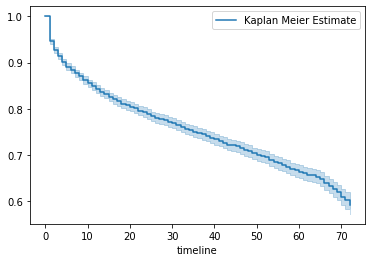

In [68]:
km = KaplanMeierFitter()
km.fit(duration, event_observed, label = 'Kaplan Meier Estimate')
km.plot()

#### 고객의 스트리밍 서비스 구독 방식에 따라 이탈 가능성의 차이가 있는지 보고자 한다
- 서비스를 월마다 갱신하는 것이 아닌, 장기구독 형태일수록 이탈 확률이 줄어듬

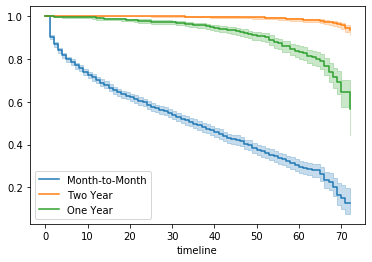

In [70]:
kmf = KaplanMeierFitter()

t = df['tenure'] # time to event
e = df['Churn'] # event occured or censored

groups = df['Contract']
cohort1 = (groups == 0)
cohort2 = (groups == 2)
cohort3 = (groups == 1)

kmf.fit(t[cohort1], e[cohort1], label = 'Month-to-Month')
ax = kmf.plot()

kmf.fit(t[cohort2], e[cohort2], label = 'Two Year')
ax1 = kmf.plot(ax = ax)

kmf.fit(t[cohort3], e[cohort3], label = 'One Year')
kmf.plot(ax = ax1)

In [71]:
from lifelines import WeibullAFTFitter

In [75]:
df[(df['tenure'] == 0)] = 0.0001

In [89]:
aft = WeibullAFTFitter()
aft.fit(df.iloc[:,1:], duration_col = 'tenure', event_col = 'Churn')

<lifelines.WeibullAFTFitter: fitted with 7043 total observations, 5163 right-censored observations>

In [90]:
aft.print_summary()

<lifelines.WeibullAFTFitter: fitted with 7043 total observations, 5163 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
   number of observations = 7043
number of events observed = 1880
           log-likelihood = -8246.33
         time fit was run = 2021-09-12 11:07:23 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                
lambda_ Contract           0.66       1.94       0.05             0.56             0.76                 1.75                 2.15
        Dependents         0.12       1.13       0.05             0.01             0.22                 1.02                 1.25
        DeviceProtection   0.30       1.36       0.05             0.20             0.40                 1.23                 1.50
        InternetService   -0.98       0.38       0.11            -1.19            -0.77                 0.31                 0.46
        MonthlyCharges    -0.07       0.93       0.00            -0.08            -0.06                 0.93                 0.94
        MultipleLines      0.32       1.37       0.05             0.22             0.41                 1.25                 1.51
        OnlineBackup       0.36       1.44       0.05             0.26             0.47                 1.30                 1.59
        OnlineSecurity     0.52       1.68       0.06             0.39             0.64                 1.48                 1.89
        PaperlessBilling  -0.11       0.90       0.04            -0.19            -0.03                 0.82                 0.97
        Partner            0.13       1.14       0.04             0.05             0.21                 1.05                 1.23
        PaymentMethod      0.12       1.13       0.02             0.09             0.15                 1.09                 1.17
        PhoneService       0.85       2.35       0.12             0.62             1.09                 1.86                 2.97
        SeniorCitizen     -0.02       0.98       0.04            -0.11             0.06                 0.90                 1.06
        StreamingMovies    0.50       1.65       0.07             0.37             0.64                 1.45                 1.89
        StreamingTV        0.49       1.63       0.07             0.36             0.62                 1.43                 1.86
        TechSupport        0.45       1.57       0.06             0.34             0.57                 1.40                 1.77
        TotalCharges       0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
        gender             0.03       1.03       0.04            -0.04             0.10                 0.96                 1.11
        Intercept          3.75      42.35       0.11             3.52             3.97                33.81                53.06
rho_    Intercept          0.27       1.32       0.02             0.24             0.31                 1.27                 1.37

                              z      p   -log2(p)
param   covariate                                
lambda_ Contract          12.56 <0.005     117.76
        Dependents         2.24   0.02       5.33
        DeviceProtection   5.92 <0.005      28.24
        InternetService   -9.14 <0.005      63.76
        MonthlyCharges   -14.68 <0.005     159.66
        MultipleLines      6.66 <0.005      35.14
        OnlineBackup       6.96 <0.005      38.11
        OnlineSecurity     8.29 <0.005      52.91
        PaperlessBilling  -2.57   0.01       6.62
        Partner            3.12 <0.005       9.12
        PaymentMethod      7.01 <0.005      38.60
        PhoneService       7.11 <0.005      39.62
        SeniorCitizen     -0.49   0.62       0.68
        StreamingMovies    7.41 <0.005      42.89
      

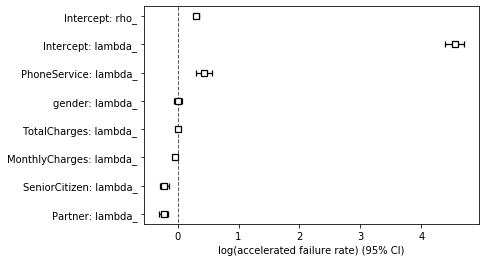

In [27]:
aft.plot()